Reference: [sujaybabruwad's GitHub](https://github.com/sujaybabruwad/LeNet-in-Tensorflow)

In [80]:
from IPython.display import Image

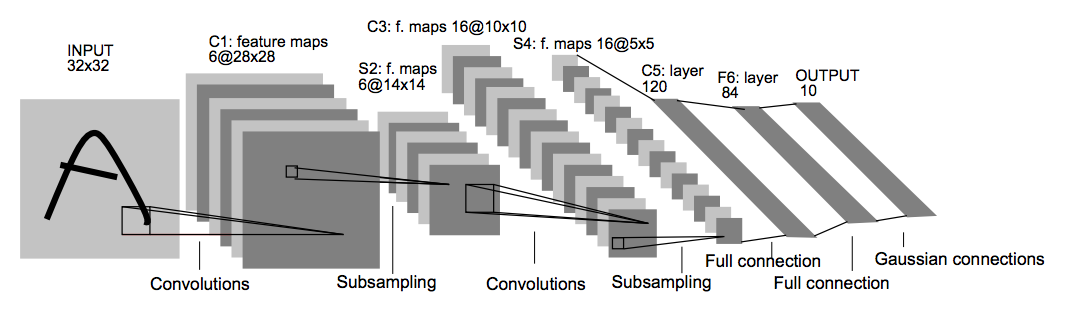

In [81]:
Image('https://github.com/sujaybabruwad/LeNet-in-Tensorflow/raw/master/lenet.png')

**Structure**

- Input Image is 28x28x1 and converted to 32x32x1 as per LeNet requirements.
- Convolution layer 1: The output shape should be 28x28x6.
- Activation 1: Your choice of activation function.
- Pooling layer 1: The output shape should be 14x14x6.
- Convolution layer 2: The output shape should be 10x10x16.
- Activation 2: Your choice of activation function.
- Pooling layer 2: The output shape should be 5x5x16.
- Flatten layer: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
- Fully connected layer 1: This should have 120 outputs.
- Activation 3: Your choice of activation function.
- Fully connected layer 2: This should have 10 outputs.
- Return the result of the 2nd fully connected layer from the LeNet function

In [100]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [101]:
dataset_name = 'mnist'

In [102]:
(train, test), metadata = tfds.load(dataset_name, split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

In [103]:
metadata.features['label'].num_classes

10

In [104]:
def preprocessing(image, label):
    image = tf.reshape(image, (28, 28))
    image = tf.pad(image, tf.constant([[2, 2], [2, 2]]))
    image = tf.expand_dims(image, -1)
    return image / 255, label

In [105]:
train_data = train.map(preprocessing).batch(32).shuffle(1000)
test_data = test.map(preprocessing).batch(32).shuffle(1000)

In [112]:
class LeNet5(tf.keras.models.Model):
    def __init__(self, num_classes, **kwargs):
        super(LeNet5, self).__init__(num_classes, **kwargs)
        self.conv2d_1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')
        self.avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
        self.conv2d_2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')
        self.flatten = tf.keras.layers.Flatten()
        self.dense_1 = tf.keras.layers.Dense(120, activation='tanh')
        self.dense_2 = tf.keras.layers.Dense(84, activation='tanh')
        self.output_ = tf.keras.layers.Dense(num_classes, activation='softmax')
    
    def summary(self):
        x = tf.keras.layers.Input(shape=(32, 32, 1))
        model = tf.keras.models.Model(inputs=[x], outputs=self.call(x))
        return model.summary()
    
    def call(self, x):
        x = self.conv2d_1(x)
        x = self.avg_pool(x)
        x = self.conv2d_2(x)
        x = self.avg_pool(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.output_(x)
        return x
    

In [113]:
model = LeNet5(10)

In [114]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 28, 28, 6)    156         input_6[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_9 (AveragePoo multiple             0           conv2d_18[0][0]                  
                                                                 conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 10, 10, 16)   2416        average_pooling2d_9[0][0]  

In [116]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [117]:
model.fit(train_data, validation_data=(test_data), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2500 - acc: 0.9250 - val_loss: 0.1253 - val_acc: 0.9624
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0949 - acc: 0.9703 - val_loss: 0.1148 - val_acc: 0.9644
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0657 - acc: 0.9797 - val_loss: 0.0713 - val_acc: 0.9789
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0671 - val_acc: 0.9803
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0395 - acc: 0.9873 - val_loss: 0.0773 - val_acc: 0.9767
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.0682 - val_acc: 0.9794
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0261 - acc: 0.9914 - val_loss: 0.0587 - val_acc: 0.9833
Epoch 8/10
1500/1500 [==============================] - 5s 3ms